In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [12]:
import re
import ast
import json
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

from util import count_edge_crossings

# Notebook to analyze answers to edge crossing counting tasks

In [ ]:
number_r = re.compile(r"^\d*[.,]?\d*$")

## Load the queries

In [5]:
def parse_crossing_query(query: str):
    query = query.split("\n")
    layer_a_str = query[3]
    layer_b_str = query[4]
    edges_str = query[7]

    layer_a = ast.literal_eval(layer_a_str.split("A:")[1].strip())
    layer_b = ast.literal_eval(layer_b_str.split("B:")[1].strip())
    edges = ast.literal_eval(edges_str.split("Tuples:")[1].strip())

    return edges, {0: layer_a, 1: layer_b}

In [9]:
cross_query_dir = "queries/crossings_prompts_steps"
cross_query_files = set(sorted(os.listdir(cross_query_dir)))
print("Number of crossing queries: {}".format(len(cross_query_files)))

cross_queries = {}
cross_queries_gt = {}
for query_file in cross_query_files:
    with open(os.path.join(cross_query_dir, query_file), "r") as f:
        query = f.read()
        edges, ranks = parse_crossing_query(query)
        cross_queries[query_file] = (edges, ranks)
        gt = count_edge_crossings(edges, ranks)
        cross_queries_gt[query_file] = gt

Number of crossing queries: 94


## Load answers -- Standard

## Load answers -- Step

In [22]:
cross_step_answers_dir = "answers/crossings_prompts_steps"
cross_step_answers_files = sorted(os.listdir(cross_step_answers_dir))
print("Number of crossing Step answers: {}".format(len(cross_step_answers_files)))

Number of crossing Step answers: 94


In [24]:
cross_step_is_number = {}
cross_step_not_number = {}

for cross_step_file in cross_step_answers_files:
    answer = open(os.path.join(cross_step_answers_dir, cross_step_file), "r").read().strip()
    answer = answer.split("\n")[-1].strip()
    
    answer = answer.split()

    found_number = False
    for a_word in answer:
        if number_r.match(a_word):
            try:
                cross_step_is_number[cross_step_file] = float(a_word)
                found_number = True
            except:
                cross_step_not_number[cross_step_file] = answer
                break
    if not found_number:
        cross_step_not_number[cross_step_file] = answer

print("Answer is a number:", len(cross_step_is_number))
print("Answer is not a number:", len(cross_step_not_number))
print(cross_step_not_number.keys())

cross_step_integer = {}
cross_step_float = {}
for cross_step_file, answer in cross_step_is_number.items():
    if answer.is_integer():
        cross_step_integer[cross_step_file] = int(answer)
    else:
        cross_step_float[cross_step_file] = answer

print("Answer is an Integer:", len(cross_step_integer))
print("Answer is a Float:", len(cross_step_float))

Answer is a number: 69
Answer is not a number: 27
dict_keys(['grafo1643.10_0_1.txt', 'grafo1643.10_4_5.txt', 'grafo1643.10_5_6.txt', 'grafo1657.10_1_2.txt', 'grafo2105.10_0_1.txt', 'grafo219.11_0_1.txt', 'grafo267.11_2_3.txt', 'grafo2812.11_0_1.txt', 'grafo2812.11_1_2.txt', 'grafo2812.11_3_4.txt', 'grafo2896.10_0_1.txt', 'grafo2896.10_4_5.txt', 'grafo2931.11_1_2.txt', 'grafo2931.11_2_3.txt', 'grafo2953.11_1_2.txt', 'grafo2964.11_2_3.txt', 'grafo376.10_0_1.txt', 'grafo376.10_3_4.txt', 'grafo462.10_2_3.txt', 'grafo462.10_3_4.txt', 'grafo532.11_1_2.txt', 'grafo717.10_0_1.txt', 'grafo717.10_4_5.txt', 'grafo717.10_5_6.txt', 'grafo857.11_2_3.txt', 'grafo857.11_7_8.txt', 'grafo938.10_2_3.txt'])
Answer is an Integer: 69
Answer is a Float: 0


In [28]:
step_correct = 0.0
step_more = 0.0
step_less = 0.0
step_wrong = float(len(cross_step_not_number) + len(cross_step_float))

for cross_step_file, answer in cross_step_integer.items():
    gt = cross_queries_gt[cross_step_file]
    if answer == gt:
        step_correct += 1.0
    elif answer > gt:
        step_more += 1.0
    else:
        step_less += 1.0

step_data = {
    "Correct": step_correct,
    "Incorrect more": step_more,
    "Incorrect less": step_less,
    "Malformed": step_wrong
}
step_df = pd.DataFrame.from_dict(step_data, orient="index", columns=["Count"])

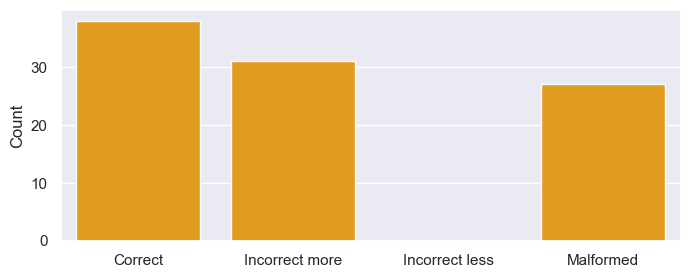

In [29]:
sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=step_df.index, y='Count', data=step_df, color='orange')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

## Load answers -- ICL

In [11]:
cross_icl_answers_dir = "answers/crossings_prompts_icl"
cross_icl_answers_files = sorted(os.listdir(cross_icl_answers_dir))
print("Number of crossing ICL answers: {}".format(len(cross_icl_answers_files)))

Number of crossing ICL answers: 10


In [15]:
cross_icl_is_number = {}
cross_icl_not_number = {}

for cross_icl_file in cross_icl_answers_files:
    answer = open(os.path.join(cross_icl_answers_dir, cross_icl_file), "r").read().strip()
    answer = answer.split("\n")[-1].strip()
    
    if number_r.match(answer):
        cross_icl_is_number[cross_icl_file] = float(answer)
    else:
        cross_icl_not_number[cross_icl_file] = answer

print("Answer is a number:", len(cross_icl_is_number))
print("Answer is not a number:", len(cross_icl_not_number))
print(cross_icl_not_number.keys())

cross_icl_integer = {}
cross_icl_float = {}
for cross_icl_file, answer in cross_icl_is_number.items():
    if answer.is_integer():
        cross_icl_integer[cross_icl_file] = int(answer)
    else:
        cross_icl_float[cross_icl_file] = answer

print("Answer is an Integer:", len(cross_icl_integer))
print("Answer is a Float:", len(cross_icl_float))

Answer is a number: 10
Answer is not a number: 0
dict_keys([])
Answer is an Integer: 10
Answer is a Float: 0


In [18]:
icl_correct = 0.0
icl_more = 0.0
icl_less = 0.0
icl_wrong = float(len(cross_icl_not_number) + len(cross_icl_float))

for cross_icl_file, answer in cross_icl_integer.items():
    gt = cross_queries_gt[cross_icl_file]
    if answer == gt:
        icl_correct += 1.0
    elif answer > gt:
        icl_more += 1.0
    else:
        icl_less += 1.0

icl_data = {
    "Correct": icl_correct,
    "Incorrect more": icl_more,
    "Incorrect less": icl_less,
    "Malformed": icl_wrong
}
icl_df = pd.DataFrame.from_dict(icl_data, orient="index", columns=["Count"])

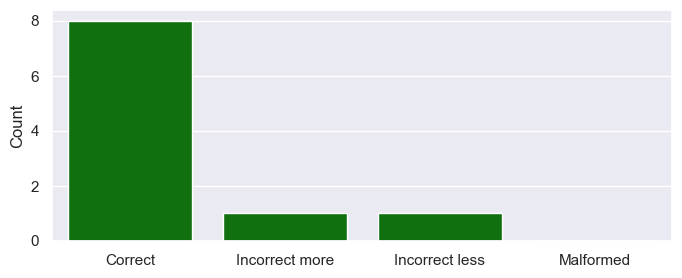

In [20]:
sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=icl_df.index, y='Count', data=icl_df, color='green')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()